In [1]:
import pandas as pd 
import pandas as np 

In [3]:
df = pd.read_csv('spam.csv' , encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## DATA CLEANING 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' ,'Unnamed: 4'] , inplace=True)

In [14]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)

In [16]:
df.sample(4)

,target,text
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
4560,ham,Good afternoon my boytoy. How goes that walkin...
3596,spam,Congratulations YOU'VE Won. You're a Winner in...
5373,ham,"K I'll head out in a few mins, see you there"


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()

In [19]:
df['target']=label.fit_transform(df['target'])

In [20]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
df.duplicated().sum()

403

In [23]:
 df = df.drop_duplicates(keep='first')

In [25]:
df.shape

(5169, 2)

# EDA 

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

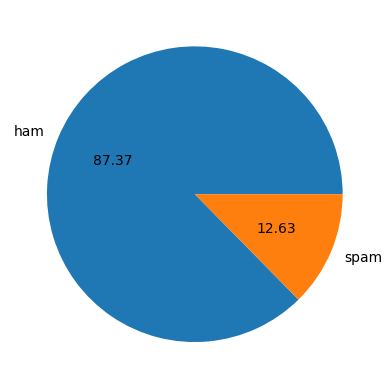

In [32]:
plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct='%0.2f')
plt.show()

<Axes: xlabel='target', ylabel='count'>

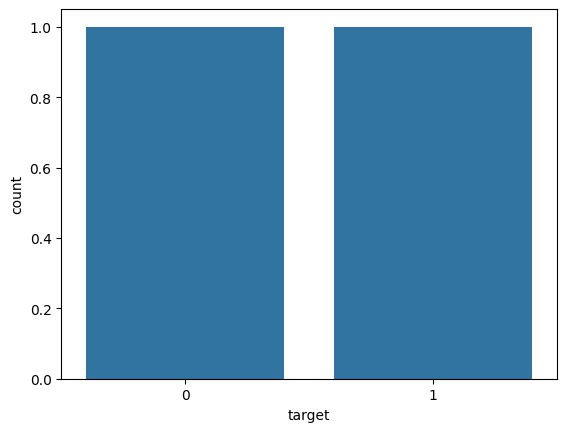

In [34]:
sns.countplot(df['target'].value_counts())

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['num_characters'] = df['text'].apply(len)

C:\Users\ramas\AppData\Local\Temp\ipykernel_18244\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# fetch numbers of the words 

In [51]:
df['num_words'] = df['text'].apply(lambda x :len( nltk.word_tokenize(x)))

C:\Users\ramas\AppData\Local\Temp\ipykernel_18244\3083046558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x :len( nltk.word_tokenize(x)))


In [52]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [55]:
df['num_sentences'] = df['text'].apply(lambda x :len( nltk.sent_tokenize(x)))

C:\Users\ramas\AppData\Local\Temp\ipykernel_18244\3923478055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x :len( nltk.sent_tokenize(x)))


In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
# for the ham message 
df[df['target']==0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
df[df['target']==1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

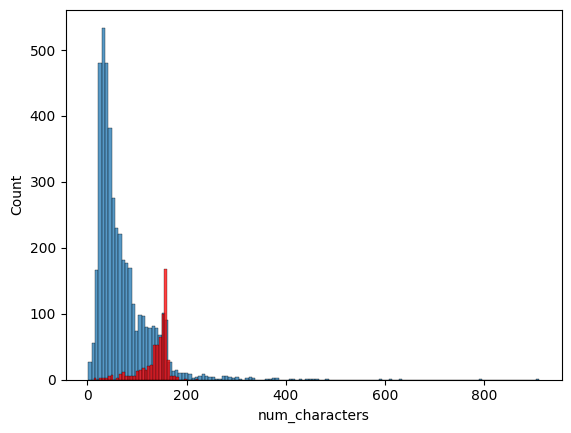

In [61]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color='r')

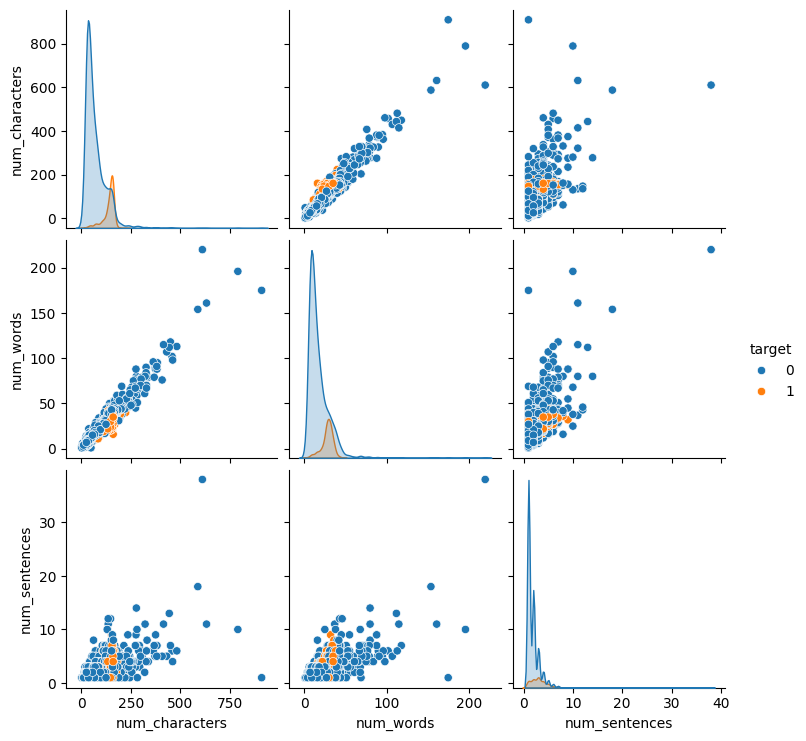

In [63]:
sns.pairplot(df , hue='target')

In [ ]:
sns.heatmap(df.corr(),annot=True)

#  DATA PREPROCESSING 

In [ ]:
  LOWER CASE
  TOKENIZATION
  REMOVING SPECIAL CHARACTERS 
  REMOVING STOP WORDS AND PUNCTUATION 
  STEMMING

In [96]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
       if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [95]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [98]:
transform_text('hi hoW are you ? ashish loving  dancing   ')

'hi ashish love danc'

In [83]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
transform_text('hi i am ashis  @@2 %%')

['hi', 'i', 'am', 'ashis', '2']

In [84]:
import string


In [85]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\ramas\AppData\Local\Temp\ipykernel_18244\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [101]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [102]:
from wordcloud import WordCloud

In [103]:
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')     


In [105]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

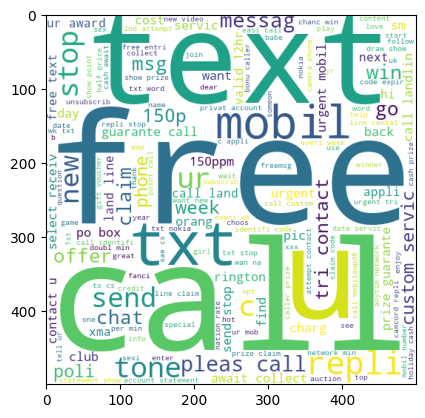

In [106]:
plt.imshow(spam_wc)

In [107]:
spam_wc1 = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

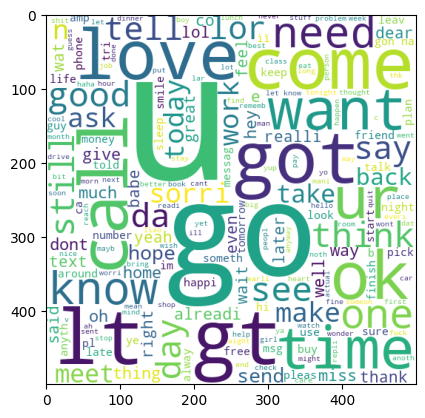

In [109]:
plt.imshow(spam_wc1)

In [110]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [111]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [113]:
len(spam_corpus)

9939

# MODEL BUILDING 

In [138]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [219]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x = cv.fit_transform(df['transformed_text']).toarray()

In [220]:
x.shape

(5169, 6708)

In [221]:
y = df['target'].values

In [222]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=2 )

In [223]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, recall_score 

In [224]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [225]:
gnb.fit(x_train , y_train)
y_pre1 = gnb.predict(x_test)
print(accuracy_score(y_test , y_pre1))
print(confusion_matrix(y_test , y_pre1))
print(recall_score(y_test , y_pre1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.855072463768116


In [226]:
mnb.fit(x_train , y_train)
y_pre2 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pre2))
print(confusion_matrix(y_test , y_pre2))
print(recall_score(y_test , y_pre2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.9130434782608695


In [199]:
bnb.fit(x_train , y_train)
y_pre3 = bnb.predict(x_test)
print(accuracy_score(y_test , y_pre3))
print(confusion_matrix(y_test , y_pre3))
print(recall_score(y_test , y_pre3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.8840579710144928


In [159]:
# cv mnb 

In [228]:
import pickle


In [230]:
pickle.dump(cv , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))